In [198]:
import os
import re
import pandas as pd

In [199]:
folder_path = 'data_raw'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
dfs = []
for file in json_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_json(file_path)
    dfs.append(data)
df = pd.concat(dfs, ignore_index=True)

In [200]:
def denumber(x):
    if isinstance(x, str):
        while x[-1] in ['0','1','2','3','4','5','6','7','8','9']:
            x = x[:-1]
        return x.strip()
    else:
        return x

In [201]:
df['competition'].drop_duplicates().to_list()

['1955–56 European Cup',
 '1955–58 Inter-Cities Fairs Cup',
 '1956–57 European Cup',
 '1957–58 European Cup',
 '1958–59 European Cup',
 '1958–60 Inter-Cities Fairs Cup',
 '1959–60 European Cup',
 '1960–61 European Cup',
 "1960–61 European Cup Winners' Cup",
 '1960–61 Inter-Cities Fairs Cup',
 '1961–62 European Cup',
 "1961–62 European Cup Winners' Cup",
 '1961–62 Inter-Cities Fairs Cup',
 '1962–63 European Cup',
 "1962–63 European Cup Winners' Cup",
 '1962–63 Inter-Cities Fairs Cup',
 '1963–64 European Cup',
 "1963–64 European Cup Winners' Cup",
 '1963–64 Inter-Cities Fairs Cup',
 '1964–65 European Cup',
 "1964–65 European Cup Winners' Cup",
 '1964–65 Inter-Cities Fairs Cup',
 '1965–66 European Cup',
 "1965–66 European Cup Winners' Cup",
 '1965–66 Inter-Cities Fairs Cup',
 '1966–67 European Cup',
 "1966–67 European Cup Winners' Cup",
 '1966–67 Inter-Cities Fairs Cup',
 '1967–68 European Cup',
 "1967–68 European Cup Winners' Cup",
 '1967–68 Inter-Cities Fairs Cup',
 '1968–69 European Cu

In [202]:
def tell_competition(x):
    x = str(x)
    if "Cup Winners" in x:
        return "CWC"
    elif ("European Cup" in x) and ('Winners') not in x:
        return "UCL"
    elif "Champions League" in x:
        return "UCL"
    elif ("UEFA Cup" in x) and ('Winners') not in x:
        return "EL"
    elif "Europa League" in x:
        return "EL"
    elif "Conference League" in x:
        return "UECL"
    elif "Inter-Cities Fairs Cup" in x:
        return "ICFC"
    elif "Intertoto" in x:
        return "Intertoto"
    else:
        print(x)
        return None

In [203]:
def tell_season(x):
    x = str(x)
    try:
        season = re.search('\d{4}–{0,1}\d{0,4}',x).group()
        season = season.replace('–','-')
        if len(season) == 9:
            season = season[0:5] + season[-2:]
        elif len(season) == 4:
            season = f"{int(season) - 1}-{season[-2:]}"
        return season
    except:
        return None

In [204]:
df['competitonOriginal'] = df['competition']

In [205]:
df['competition'] = df['competitonOriginal'].apply(lambda x: tell_competition(x))

nan


In [206]:
df['season'] = df['competitonOriginal'].apply(lambda x: tell_season(x))

In [207]:
df.groupby('competition').size().nlargest()

competition
EL           13496
UCL           8283
CWC           1986
Intertoto     1561
UECL          1382
dtype: int64

In [208]:
df['location'] = df['location'].apply(lambda x: denumber(x))

In [209]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [210]:
df = df.sort_values(by='date')

In [211]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
1075,CWC,1932-04-14,1-0,Celtic,Scotland,Celtic_F.C.,Liverpool,England,Liverpool_F.C.,"Celtic Park, Glasgow",Semi-finals,76397,1965–66 European Cup Winners' Cup,1965-66
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27246,UECL,2024-08-15,v,Hajduk Split,Croatia,NaN,Ružomberok,Slovakia,NaN,"Stadion Poljud, Split",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27326,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26986,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [212]:
df.shape

(27327, 14)

In [213]:
df = df.drop_duplicates()

In [214]:
df.shape

(27327, 14)

In [215]:
df = df.replace("1932-04-14","1966-04-14")

In [216]:
df.sort_values(by='date')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000,1955–56 European Cup,1955-56
3,UCL,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",First round,5000,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27226,UECL,2024-08-15,v,Vitória de Guimarães,Portugal,NaN,Zürich,Switzerland,NaN,"Estádio D. Afonso Henriques, Guimarães",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27312,EL,2024-08-15,v,Lincoln Red Imps,Gibraltar,NaN,Dinamo Minsk,Belarus,NaN,"Europa Sports Park, Gibraltar",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26986,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [217]:
df[df['score'] == 'v']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
4215,UCL,1982-10-20,v,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,17 Nëntori,Albania,KF_Tirana,NaN,Second round,NaN,1982–83 European Cup,1982-83
27043,UCL,2024-08-06,v,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,"Tofiq Bahramov Republican Stadium, Baku",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
27049,UCL,2024-08-06,v,Malmö FF,Sweden,Malm%C3%B6_FF,PAOK,Greece,PAOK_FC,"Stadion, Malmö",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
27059,UCL,2024-08-06,v,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Rangers,Scotland,Rangers_F.C.,"Arena Lublin, Lublin, Poland",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
27057,UCL,2024-08-06,v,Lille,France,Lille_OSC,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Stade du Hainaut, Valenciennes",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27270,UECL,2024-08-15,v,Sheriff Tiraspol,Moldova,NaN,Olimpija Ljubljana,Slovenia,NaN,"Sheriff Arena, Tiraspol",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27080,UECL,2024-08-15,v,Larne,Northern Ireland,NaN,Ballkani,Kosovo,NaN,"Inver Park, Larne",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27246,UECL,2024-08-15,v,Hajduk Split,Croatia,NaN,Ružomberok,Slovakia,NaN,"Stadion Poljud, Split",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27326,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25


In [218]:
df = df[df['homeTeam'] != 'TBD']
df = df[df['awayTeam'] != 'TBD']

In [219]:
df[df['competition'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
7035,None,1994-05-18,4-0,Milan,Italy,/wiki/AC_Milan,Barcelona,Spain,/wiki/FC_Barcelona,"Olympic Stadium, Athens",Knockout stage,70000,NaN,None


In [220]:
df[df['phase'] == 'Summary']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
10124,EL,1999-08-10,3-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Sileks,North Macedonia,FK_Sileks,"Shakhtar Stadium, Donetsk",Summary,15000.0,1999–2000 UEFA Cup qualifying round,1999-00
10156,EL,1999-08-12,0-0,Rīga,Latvia,FK_R%C4%ABga,Helsingborg,Sweden,Helsingborgs_IF,"Daugava Stadium, Liepāja",Summary,600.0,1999–2000 UEFA Cup qualifying round,1999-00
10174,EL,1999-08-12,0-3,Sliema Wanderers,Malta,Sliema_Wanderers_F.C.,Zürich,Switzerland,FC_Z%C3%BCrich,"Ta' Qali National Stadium, Ta' Qali",Summary,3000.0,1999–2000 UEFA Cup qualifying round,1999-00
10176,EL,1999-08-12,4-0,Grasshopper,Switzerland,Grasshopper_Club_Z%C3%BCrich,Bray Wanderers,Republic of Ireland,Bray_Wanderers_F.C.,"Hardturm, Zürich",Summary,5600.0,1999–2000 UEFA Cup qualifying round,1999-00
10168,EL,1999-08-12,3-0,Steaua București,Romania,FCSB,Levadia,Estonia,FC_Levadia_Tallinn,"Stadionul Steaua, Bucharest",Summary,5000.0,1999–2000 UEFA Cup qualifying round,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15763,EL,2008-10-02,1-1,Vaslui,Romania,FC_Vaslui,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Stadionul Municipal, Vaslui",Summary,8750,2008–09 UEFA Cup first round,2008-09
15762,EL,2008-10-02,2-0 (a.e.t.),Deportivo La Coruña,Spain,Deportivo_de_La_Coru%C3%B1a,Brann,Norway,SK_Brann,"Estadio Riazor, A Coruña",Summary,20000,2008–09 UEFA Cup first round,2008-09
15761,EL,2008-10-02,5-2,Heerenveen,Netherlands,SC_Heerenveen,Vitória de Setúbal,Portugal,Vit%C3%B3ria_F.C.,"Abe Lenstra Stadion, Heerenveen",Summary,23000,2008–09 UEFA Cup first round,2008-09
15769,EL,2008-10-02,1-1,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,Wolfsburg,Germany,VfL_Wolfsburg,"Stadionul Giulești-Valentin Stănescu, Bucharest",Summary,7000,2008–09 UEFA Cup first round,2008-09


In [221]:
df['phase'] = df['phase'].apply(lambda x: str(x).lower().replace('–','-'))

In [222]:
def desummary(row):
    if row['phase'] not in ['summary','teams','notes','match','matches','none','nan']:
        return row['phase']
    else:
        if 'League' in row['competition']:
            return row['competition'].split('League')[1].strip()
        elif 'Cup' in row['competition']:
            return row['competition'].split('Cup')[1].strip()

In [223]:
df['phase'] = df.apply(lambda x: desummary(x), axis=1)

In [224]:
df.groupby('phase').size()

phase
final                        205
finals                        60
first qualifying round      2090
first round                 4433
fourth round                  80
group a                       16
group b                       16
group c                       16
group d                       16
group stage                  376
groups                      5609
knockout round play-offs      80
knockout stage                 8
play-off round              1053
preliminary round            552
qualifying round             406
quarter-finals              1240
round of 16                  678
round of 32                  544
second qualifying round     2535
second round                2270
semi-finals                  779
third qualifying round      1766
third round                  841
dtype: int64

<Axes: xlabel='season'>

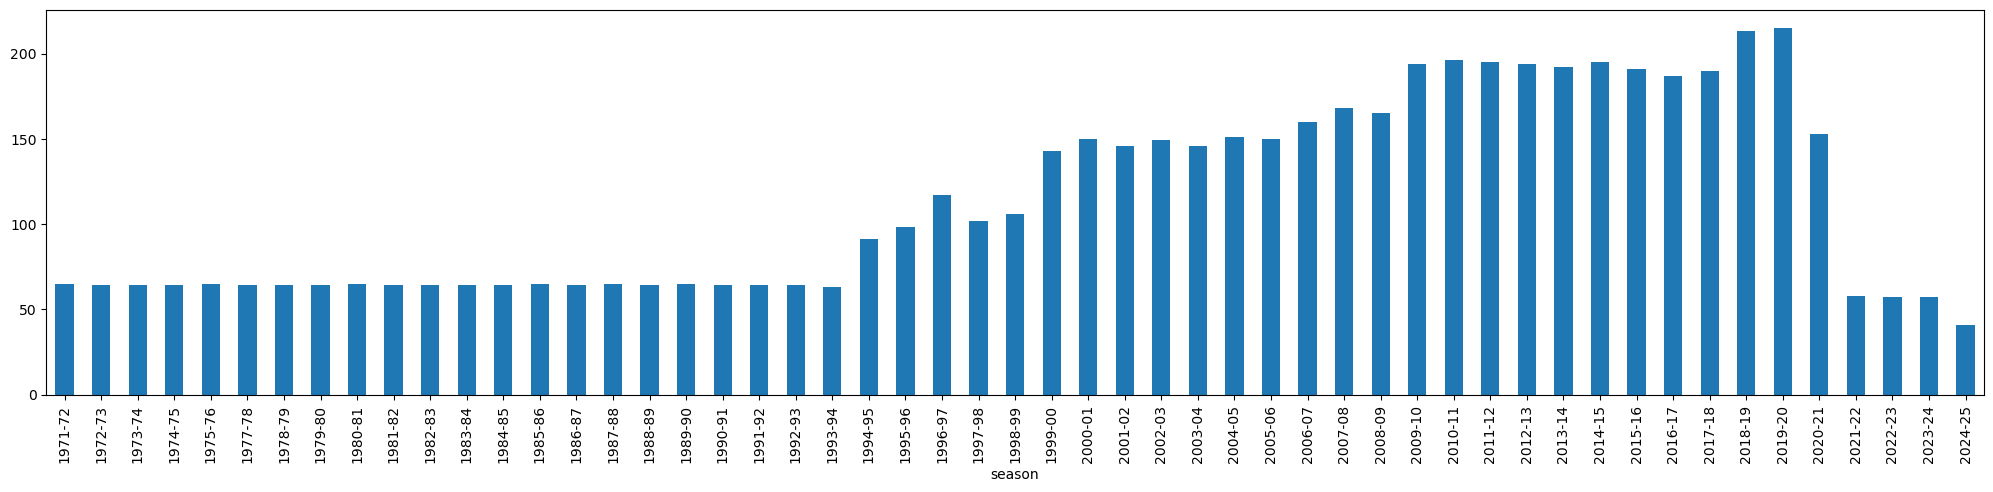

In [225]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [226]:
df.to_csv(os.path.join('data','matches.csv'), index=False)